## **10.5** [Computational] **Frequentist and Bayesian analysis.** 
In this problem, you will practice solving a rather simple data-fitting problem using several different approaches. Assume the following dataset (xi, yi)
                                    
                                    y(x = 1) = 2.0 ± 1.0
                                    y(x = 2) = 4.0 ± 2.0
                                    y(x = 3) = 6.0 ± 3.0
                                    y(x = 4) = 8.0 ± 4.0,

where you can assume that these four measurements are independent and
identically distributed (iid), and that each comes from a Gaussian distribu-tion. You may also assume that all sources of uncertainty are captured in the statistical errors on the measurements quoted above. Then consider a deterministic model with a single free parameter m, defined as

                                            y = mx.

**Your task is to find the best-fit value of m, as well as its 68.3% confidence/credible interval in a frequentist/Bayesian analysis.**

**a)** Write down the (Gaussian) likelihood for m. Then find the expression for the maximum-likelihood estimate (MLE), $\hat{m}$, in terms of x- and y-values ofthe data and errors on the latter, xi, yi and σi. Evaluate this to find $\hat{m}$ given the data above. [Hint: maximizing L is equivalent to minimizing χ2, and the latter is easier.]
Optionally, find also the MLE for the variance of m, and evaluate it.

**b) Frequentist analysis**: to evaluate the error in the MLE value, perform a simple Monte-Carlo simulation. Simulate your data: draw values of y from Gaussian normal distributions given the means and errors as given by the data, that is, $$y_i^{sim} ∈ N (y_i, σ_i^2)$$
where i ∈ {1, 2, 3, 4} for the four data points. Repeat this some large number of times (say, 10,000), and in each instance calculate the MLE estimate of the parameter, $\hat{m}^{sim}$. Then evaluate the mean of this distribution $\hat{m}^{freq}$, and its 68% range. A proper way to do this would be to perform the algorithm described in Fig. 10.4, but I recommend that you use a (possibly slightly inaccurate) shortcut of calculating the p-values of p = 0.16 and p = 0.84 fractions of the volume under the distribution.

**c) Bayesian analysis**: Now perform a Bayesian analysis. Assume a flat prior on the parameter of interest, say m ∈[0, 3]. Set up a simple grid over this space, and map out the posterior. Find the best-fit model, and the 68% credible interval in m. Try varying the prior on m, and comment how your results change, and whether that is to be expected or not. If everything goes well, you should be getting a very comparable error from the frequentist and Bayesian analyses, both in agreement with the direct estimator in part a).

## a) MLE 

### Data Visualization

In [616]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.integrate import quad
import statistics
from IPython.display import display, Latex

In [521]:
x = np.array([1,2,3,4])
y = np.array([2,4,6,8])
sig = np.array([1,2,3,4])

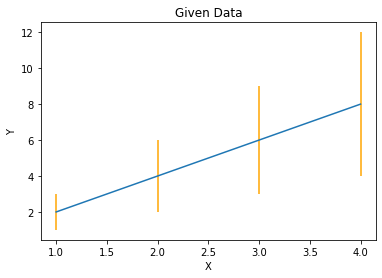

In [557]:
plt.title('Given Data')
plt.errorbar(x,y,yerr=sig,ecolor='orange', label='data')
# plt.legend(loc='upper left')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

**Calculating Maximum Likelihood Estimate value by minimizing χ2**

$$\mathcal{L} = \prod_{i} \dfrac{1}{\sqrt{2\pi\sigma_i}} * \mathrm{e}^{\dfrac{-(y_i-mx_i)^2}{2\sigma_i^2}} $$


$$\chi^2 = \sum_{i}\dfrac{(y_i-mx_i)^2}{\sigma_i^2}$$

Minimizing $\chi^2$ with respect to m to get MLE $\hat{m}$:
$$\frac{d}{dm}\chi^2 = 0$$

$\Rightarrow$ $$ -2\sum_{i} \frac{x_i(y_i-\hat{m}x_i)}{\sigma_i^2} = 0 $$

Splitting the sum across the two terms,

$$\sum_{i} \frac{x_iy_i}{\sigma_i^2} - \hat{m} \sum_{i} \frac{x_i^2}{\sigma_i^2} = 0 $$

Isolating for $\hat{m}$, we get the form of the MLE:

$$ \hat{m} = \cfrac{\sum_{i}\frac{x_iy_i}{\sigma_i^2}}{\sum_{i}\frac{x_i^2}{\sigma_i^2}}$$

Below, I solve for the given MLE form for our data set above over i ∈ {1, 2, 3, 4}

In [519]:
n = (x*y/(sig)**2) #Numerator above
d = (x**2/sig**2) #Denominator above
m_hat = n.sum()/d.sum()
print(m_hat)

2.0


## b) Frequentist Analysis 

### Monte Carlo Simulation
$$y_i^{sim} ∈ N (y_i, σ_i^2),$$ 

To simulate data, for each of the four data points I draw a random value of $y_i^{sim}$ given $y_i$ and $\sigma_i^2$ to calculate the MLE $\hat{m}$ in part **a)**

I repeat this 10,000 times to get a set of $\hat{m}$ values on which we perform Frequentist Analysis

In [526]:
m_hist = []
for _ in range(10000):
    y_freq = np.random.normal(y, sig)
    n_freq = (x*y_freq/(sig)**2)
    d_freq = (x**2/sig**2)
    m_freq = n_freq.sum()/d_freq.sum()
    m_hist.append(m_freq)


In [615]:
display(Latex(r'$\hat m^{freq}$ for 10,000 draws is '+str(round(np.mean(m_hist), 5))))

<IPython.core.display.Latex object>

In [617]:
display(Latex(r'The error or the $1 \sigma$ value on the $\hat{m}^{freq}$ value is '+str(round(np.std(m_hist), 5))))

<IPython.core.display.Latex object>

#### Confidence interval using 1 std deviation 
Calculating the 68% Confidence interval using 1 std deviation  
The vertical lines represent the 1σ interval from the mean calculated

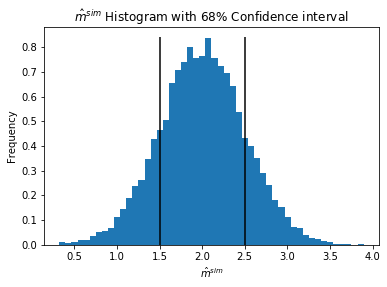

68% Confidence Interval: ( 1.50212 ,  2.50011 )


In [618]:
n, bins, _ = plt.hist(m_hist, 50, density='true')
plt.title('$\hat{m}^{sim}$ Histogram with 68% Confidence interval')
plt.vlines([np.mean(m_hist)-np.std(m_hist), np.mean(m_hist)+np.std(m_hist)], 0, 0.84)
x1 = np.mean(m_hist)-np.std(m_hist)
x2 = np.mean(m_hist)+np.std(m_hist)
plt.xlabel('$\hat{m}^{sim}$')
plt.ylabel('Frequency')
plt.show()
print('68% Confidence Interval: (', round(x1,5),', ', round(x2,5), ')')

#### Confidence interval using statistics package

In [571]:
confidence = 0.68
h = stats.norm.interval(confidence, loc=np.mean(m_hist), scale=statistics.stdev(m_hist))

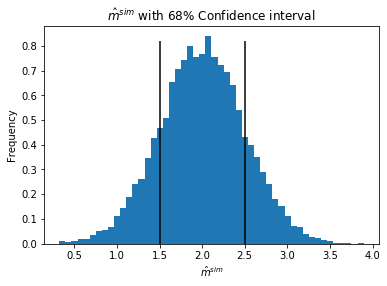

68% Confidence Interval with stats pkg:  (1.50487, 2.49737)
1σ with stats pkg:  0.49625


In [619]:
plt.hist(m_hist, 50, density='true')
plt.title('$\hat{m}^{sim}$ with 68% Confidence interval')
plt.vlines(h, 0, 0.82)
plt.xlabel('$\hat{m}^{sim}$')
plt.ylabel('Frequency')
plt.show()
print('68% Confidence Interval with stats pkg: ', tuple(map(lambda x: round(x, 5), h)))
print('1\u03C3 with stats pkg: ', round((h[1]-h[0])/2, 5))

The 1$\sigma$ value through statistics package and the std. deviation method are as follows:

$$Std\,Deviation\,1\sigma = 0.49899; \quad Statistics\,1\sigma = 0.49625 $$

These two are comparable, so going forward, I stick to the std deviation $\sigma$ value for comparison

## c) Bayesian Analysis

In [552]:
#likelihood:
def likelihood(m):
    L=1.0
    for i in range(4):
        L *= np.exp(-1/2*(y[i] - m*x[i])**2/sig[i]**2) #Normalized with constant
    return L /1.2247613813039187

In [553]:
likelihood(3)

0.1104993064792185

In [554]:
likelihood(2)

0.8164855744678765

Using the integral of the Likelihood from [0,3] to find the normalization constant and returning $\frac{L}{constant}$ in the Likelihood function

In [551]:
normalization = quad(lambda m: likelihood(m), 0, 3)
normalization

(1.2247613813039187, 1.3597582850236511e-14)

In [ ]:
POSTERIOR FROM LIKELIHOOD AND PRIOR

In [638]:
m = np.arange(0, 3.1, 0.1) # m in [0,3]
prior = 1 #Uniform prior over all m values
posterior = np.array([likelihood(mi)* prior for mi in m]) 

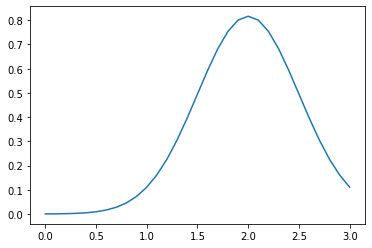

In [643]:
plt.plot(m, posterior)
plt.show()

In [646]:
m[np.argmax(posterior)], np.max(posterior)

(2.0, 0.8164855744678765)

In [640]:
def posterior_func(m):
    return likelihood(m)* prior

In [641]:
result = quad(lambda m: posterior_func(m), 0, 3)
result

(0.9999999999999998, 1.1102230246251565e-14)

In [642]:
posterior

array([2.73900396e-04, 5.97506118e-04, 1.25233429e-03, 2.52189157e-03,
       4.87933649e-03, 9.07033542e-03, 1.61999676e-02, 2.77992556e-02,
       4.58332241e-02, 7.26032179e-02, 1.10499306e-01, 1.61581433e-01,
       2.27013445e-01, 3.06436098e-01, 3.97426195e-01, 4.95223534e-01,
       5.92890214e-01, 6.81986078e-01, 7.53711180e-01, 8.00318077e-01,
       8.16485574e-01, 8.00318077e-01, 7.53711180e-01, 6.81986078e-01,
       5.92890214e-01, 4.95223534e-01, 3.97426195e-01, 3.06436098e-01,
       2.27013445e-01, 1.61581433e-01, 1.10499306e-01])

In [546]:
np.std(posterior)

0.2868120890096675

<pre>
68% credible interval:
</pre>

In [651]:
credible_interval_bay=[]
credible_interval = 0.68

total = 0
for mi, prob in zip(m, posterior):
    total += prob
    if total < credible_interval:
        credible_interval_bay.append((mi, prob))
    else:
        credible_interval_bay.append((mi, 0))

In [652]:
credible_interval_bay

[(0.0, 0.00027390039645548594),
 (0.1, 0.0005975061183766042),
 (0.2, 0.0012523342936331982),
 (0.30000000000000004, 0.002521891574461983),
 (0.4, 0.004879336486462107),
 (0.5, 0.009070335420288423),
 (0.6000000000000001, 0.01619996764042875),
 (0.7000000000000001, 0.02779925563814839),
 (0.8, 0.04583322408024569),
 (0.9, 0.07260321791393981),
 (1.0, 0.1104993064792185),
 (1.1, 0.16158143300773065),
 (1.2000000000000002, 0),
 (1.3, 0),
 (1.4000000000000001, 0),
 (1.5, 0),
 (1.6, 0),
 (1.7000000000000002, 0),
 (1.8, 0),
 (1.9000000000000001, 0),
 (2.0, 0),
 (2.1, 0),
 (2.2, 0),
 (2.3000000000000003, 0),
 (2.4000000000000004, 0),
 (2.5, 0),
 (2.6, 0),
 (2.7, 0),
 (2.8000000000000003, 0),
 (2.9000000000000004, 0),
 (3.0, 0)]

In [657]:
credible_interval_bay = np.array(credible_interval_bay)

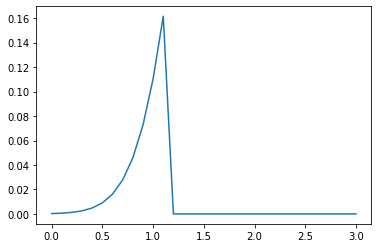

In [659]:
plt.plot(credible_interval_bay[:,0], credible_interval_bay[:,1])
plt.show()

In [449]:
confidence = 0.68
h = stats.norm.interval(confidence, loc = 2.0, scale=statistics.stdev(posterior))
print(h)

(1.711143902409741, 2.288856097590259)


In [ ]:
np.array([m,posterior])

The upper 68% bound is found by integrating out from the peak m value to some point to include 34% of the area

In [510]:
up_interval_val=quad(lambda m: likelihood(m), 2,2.48156) #Likelihood instead of posterior since flat prior
up_interval_val

(0.340002210410031, 3.774782824206635e-15)

In [511]:
2-0.48156

1.51844

In [512]:
down_interval_val=quad(lambda m: likelihood(m), 1.51844,2) #Likelihood instead of posterior since flat prior
down_interval_val

(0.340002210410031, 3.774782824206635e-15)

In [513]:
interval=(1.51844,2.48156)

In [514]:
conf = quad(lambda m: likelihood(m), 1.51844,2.48156)
conf

(0.680004420820062, 7.54956564841327e-15)

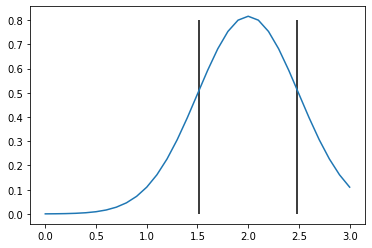

In [664]:
m = np.arange(0, 3.1, 0.1)
plt.plot(m, posterior)
plt.vlines(interval, 0,0.8)

In [666]:
round((interval[1]-interval[0])/2,5)

0.48156

<pre>WHEN CHANGING PRIOR, THE FOLLOWING HAPPENS